In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Data import

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
x = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

In [3]:
# metadata 
banknote_authentication.metadata

{'uci_id': 267,
 'name': 'Banknote Authentication',
 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication',
 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv',
 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1372,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Fri Feb 16 2024',
 'dataset_doi': '10.24432/C55P57',
 'creators': ['Volker Lohweg'],
 'intro_paper': None,
 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection w

In [4]:
# variable information 
banknote_authentication.variables

,name,role,type,demographic,description,units,missing_values
0,variance,Feature,Continuous,None,variance of Wavelet Transformed image,None,no
1,skewness,Feature,Continuous,None,skewness of Wavelet Transformed image,None,no
2,curtosis,Feature,Continuous,None,curtosis of Wavelet Transformed image,None,no
3,entropy,Feature,Continuous,None,entropy of image,None,no
4,class,Target,Integer,None,None,None,no


## Data exploration

In [5]:
df = pd.concat([x, y], axis=1)
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [6]:
df.tail(10)

,variance,skewness,curtosis,entropy,class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


**note: data is sorted by class**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
df["class"].value_counts()

class
0    762
1    610
Name: count, dtype: int64

**note: data is nearly balanced**

In [10]:
#shape of data
df.shape

(1372, 5)

In [11]:
#number of duplicates
df.duplicated().sum()

np.int64(24)

In [12]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
#make sure duplicates have removed successfully
df.duplicated().sum()

np.int64(0)

In [14]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [15]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

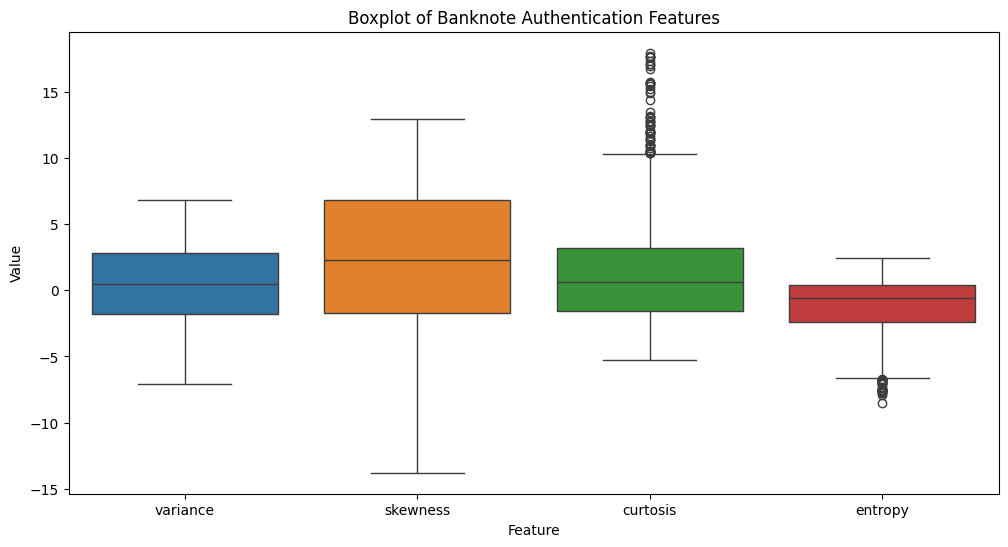

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.boxplot(data=x)
plt.title("Boxplot of Banknote Authentication Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

In [17]:
# IQR-based outlier removal
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where all features are within bounds
filtered_data = df[~((x < lower_bound) | (x > upper_bound)).any(axis=1)]

# Separate back into x and y
x_clean = filtered_data[x.columns]
y_clean = filtered_data[y.columns[0]]

print(f"Original data shape: {x.shape}")
print(f"Cleaned data shape: {x_clean.shape}")

Original data shape: (1372, 4)
Cleaned data shape: (1259, 4)


C:\Users\Shahd\AppData\Local\Temp\ipykernel_21612\2915159160.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = df[~((x < lower_bound) | (x > upper_bound)).any(axis=1)]


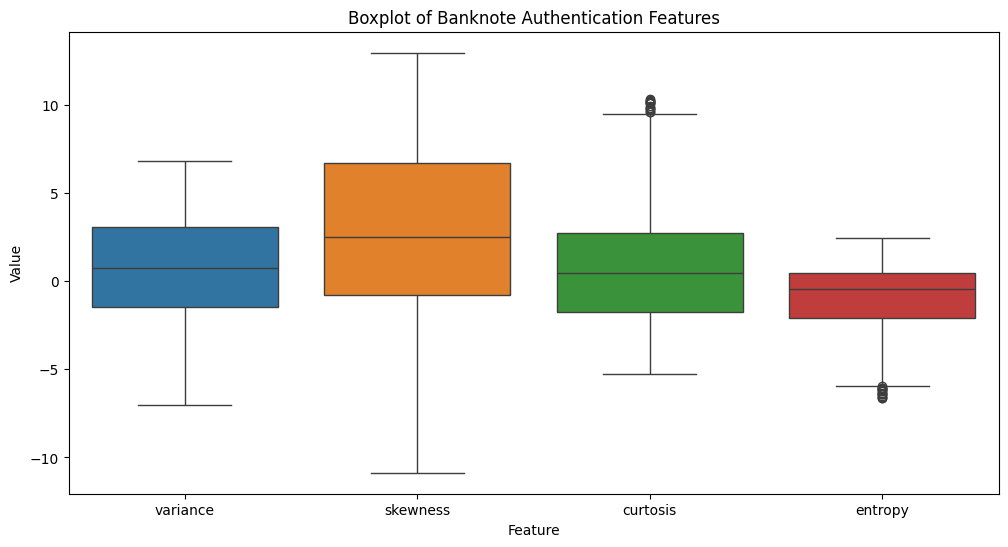

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.boxplot(data=x_clean)
plt.title("Boxplot of Banknote Authentication Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()



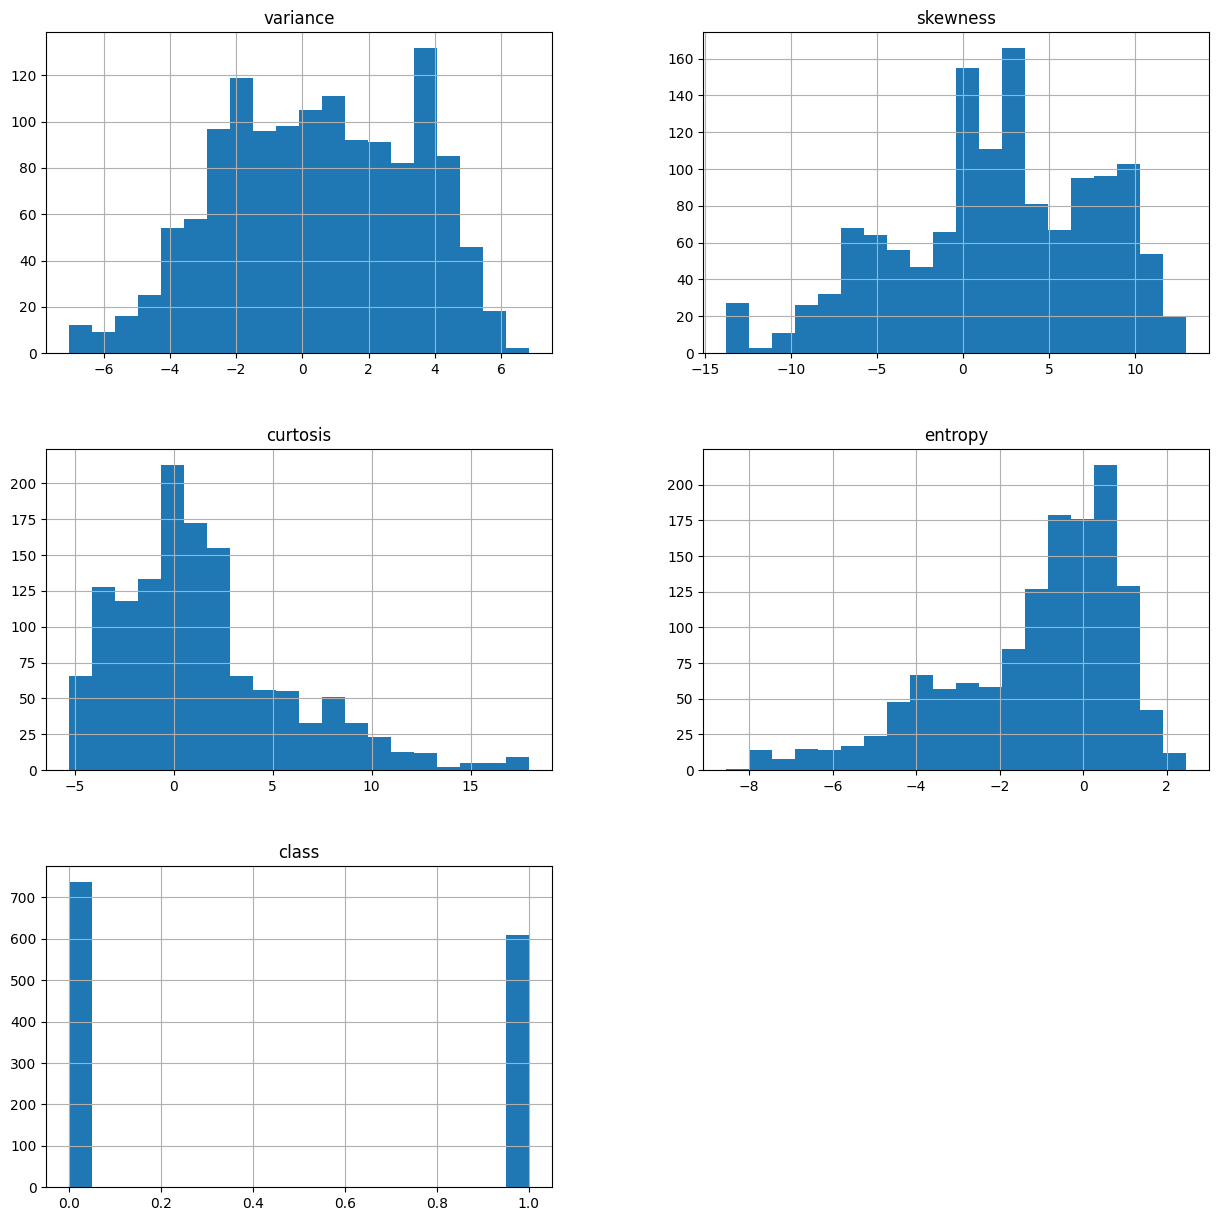

In [19]:
from matplotlib import pyplot as plt
df.hist(bins=20, figsize=(15, 15))
plt.show()

<Axes: >

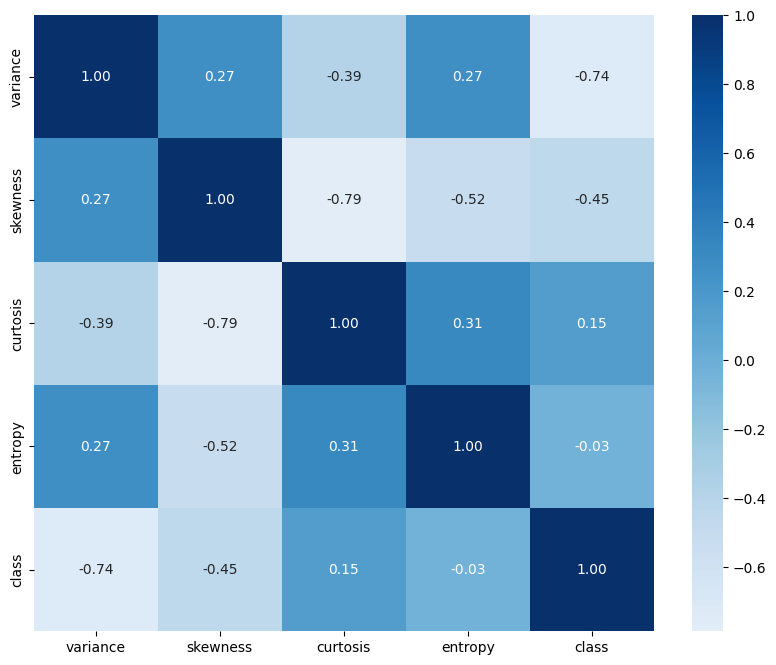

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues", center=0)

**note: variance is the most correlated feature with class**

In [21]:

# Sample data: 100 points for two features and binary classes
# np.random.seed(0)
# x_class0 = np.random.normal(loc=0.0, scale=1.0, size=(50, 2))  # Class -1
# x_class1 = np.random.normal(loc=2.0, scale=1.0, size=(50, 2))  # Class 1

# x = np.vstack((x_class0, x_class1))   # Shape: (100, 2)
# y = np.array([-1]*50 + [1]*50)        # Class labels

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='Class 0', alpha=0.6)
# plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', label='Class 1', alpha=0.6)

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Class Distribution')
# plt.legend()
# plt.grid(True)
# plt.show()


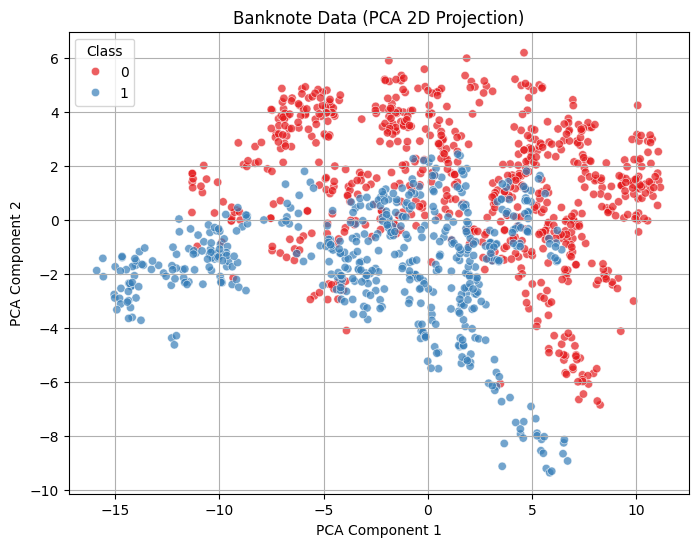

In [22]:
# Visualize the data in 2D using PCA to help select a suitable kernel
import seaborn as sns
# Reduce features to 2D for visualization
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_clean)
# Plot the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_2d[:, 0], y=x_2d[:, 1], hue=y_clean.values, palette='Set1', alpha=0.7)
plt.title("Banknote Data (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Class")
plt.grid(True)
plt.show()

# Interpretation tip:
# - If the classes are well separated by a straight line, 'linear' kernel is suitable.
# - If the classes are mixed or have curved boundaries, try 'rbf' or 'poly' kernels.

**Kernel (rbf) has the best accuracy**

## Data preprocessing

In [23]:
x = x_clean.values
y = y_clean.values

In [24]:
x

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
       ...,
       [ 0.40614,  1.3492 , -1.4501 , -0.55949],
       [-1.3887 , -4.8773 ,  6.4774 ,  0.34179],
       [-2.5419 , -0.65804,  2.6842 ,  1.1952 ]])

In [25]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
# Convert labels from {0,1} to {-1, +1} for SVM
y = np.where(y == 0, -1, 1)
y = y.reshape(-1)          # OR
y

array([-1, -1, -1, ...,  1,  1,  1])

### **Train, test, validation split**

In [27]:

# Shuffle and split the data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Print the sizes of the splits
print(f"Training data size: {len(x_train)}")
print(f"Validation data size: {len(x_val)}")
print(f"Test data size: {len(x_test)}")

Training data size: 755
Validation data size: 252
Test data size: 252


### **Standrization**

In [28]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
x_train = scaler.fit_transform(x_train)

# Use the same scaler to transform validation and test sets
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [29]:
x_train[0:5], y_train[0:5]

(array([[ 0.01488294,  0.04193256,  1.07750917,  0.80207146],
        [-1.11318307, -0.41671226,  0.26029809,  1.09997708],
        [-0.43415016, -0.41515134, -0.33073158,  1.05258231],
        [ 1.39591576, -0.41007717,  0.28996591,  1.09799382],
        [-1.27480816, -0.02559731, -0.38722131, -0.55187305]]),
 array([-1,  1,  1, -1,  1]))


Kernel: linear
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       157
           1       0.99      1.00      0.99        95

    accuracy                           1.00       252
   macro avg       0.99      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Accuracy: 0.9960


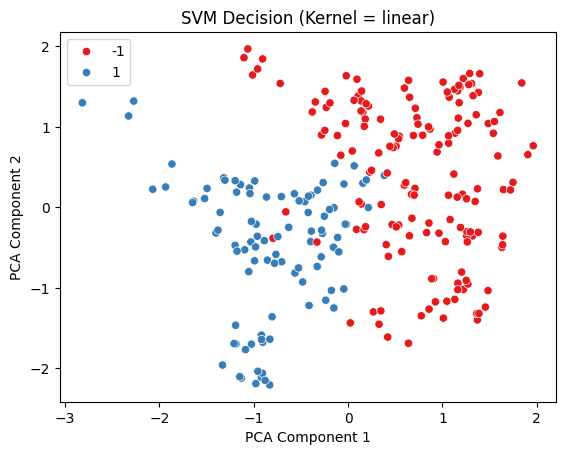


Kernel: rbf
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        95

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Accuracy: 1.0000


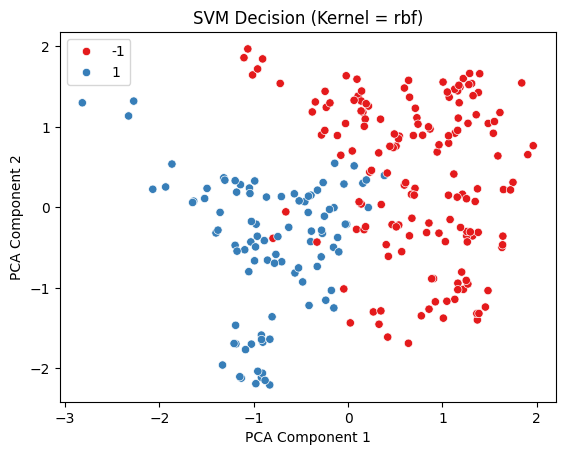


Kernel: poly
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       157
           1       0.99      1.00      0.99        95

    accuracy                           1.00       252
   macro avg       0.99      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Accuracy: 0.9960


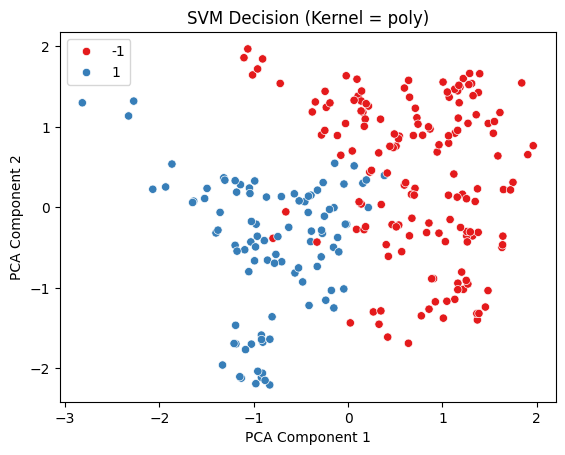


Kernel: sigmoid
              precision    recall  f1-score   support

          -1       0.89      0.92      0.91       157
           1       0.86      0.82      0.84        95

    accuracy                           0.88       252
   macro avg       0.88      0.87      0.87       252
weighted avg       0.88      0.88      0.88       252

Accuracy: 0.8810


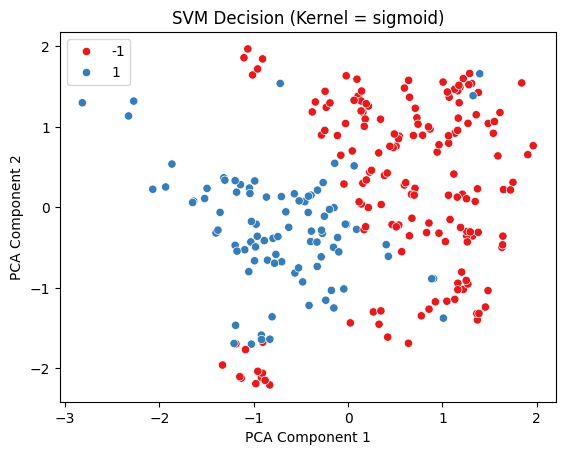

In [30]:
# Try different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    
    print(f"\nKernel: {kernel}")
    print(classification_report(y_val, y_pred))
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    
    # Visualization
    plt.figure()
    sns.scatterplot(x=x_val[:, 0], y=x_val[:, 1], hue=y_pred, palette='Set1')
    plt.title(f"SVM Decision (Kernel = {kernel})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


In [31]:
class KernelSVM:
    """
    Support Vector Machine (SVM) classifier with kernel support using hinge loss.
    Trained using either subgradient or smoothed gradient descent.

    Parameters:
    -----------
    learning_rate : float
        Step size for weight updates.
    lambda_param : float
        Regularization strength (prevents overfitting).
    epochs : int
        Number of passes through the training data.
    optimizer : str
        Optimization method: 'subgradient' (default) or 'gradient'.
    delta : float
        Small constant for smoothing the hinge loss (used in 'gradient' method).
    kernel : str
        Kernel function to use: 'linear', 'polynomial', or 'rbf'.
    gamma : float
        Kernel coefficient for 'rbf' and 'polynomial'.
    degree : int
        Degree of polynomial kernel.
    """

    def __init__(self, learning_rate=0.01, lambda_param=0.01, epochs=1000,
                 optimizer='subgradient', delta=1e-2,
                 kernel='linear', gamma=1.0, degree=3):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.optimizer = optimizer
        self.delta = delta
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree

        # Model parameters
        self.X_train = None
        self.w = None
        self.b = 0

    def _apply_kernel(self, X1, X2):
        """Compute the kernel between X1 and X2."""
        if self.kernel == 'linear':
            return X1 @ X2.T
        elif self.kernel == 'polynomial':
            return (self.gamma * X1 @ X2.T + 1) ** self.degree
        elif self.kernel == 'rbf':
            # if X1.ndim == 1: X1 = X1.reshape(1, -1)
            # if X2.ndim == 1: X2 = X2.reshape(1, -1)
            dist = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
            return np.exp(-self.gamma * dist)
        else:
            raise ValueError(f"Unsupported kernel: {self.kernel}")

    def _hinge_loss(self, K, y):
        """Compute hinge loss with regularization."""
        margins = 1 - y * (K @ self.w + self.b)
        loss = np.maximum(0, margins)
        return 0.5 * self.lambda_param * np.dot(self.w, self.w) + np.mean(loss)

    def _accuracy(self, K, y):
        """Compute classification accuracy."""
        preds = np.sign(K @ self.w + self.b)
        return np.mean(preds == y)

    def _compute_gradients(self, K, y):
        """
        Compute gradients based on the selected optimizer.
        Returns:
            dw : Gradient w.r.t weights
            db : Gradient w.r.t bias
        """
        n = K.shape[0]
        margins = y * (K @ self.w + self.b)

        if self.optimizer == 'subgradient':
            indicator = (margins < 1).astype(float)
            dw = self.lambda_param * self.w - (K.T @ (indicator * y)) / n
            db = -np.sum(indicator * y) / n

        elif self.optimizer == 'gradient':
            dw = self.lambda_param * self.w
            db = 0
            for i in range(n):
                margin = margins[i]
                if margin < 1 - self.delta:
                    dw -= y[i] * K[i] / n
                    db -= y[i] / n
                elif 1 - self.delta <= margin < 1 + self.delta:
                    factor = (1 + self.delta - margin) / (2 * self.delta)
                    dw -= factor * y[i] * K[i] / n
                    db -= factor * y[i] / n
        else:
            raise ValueError("Optimizer must be 'subgradient' or 'gradient'.")

        return dw, db

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Train the SVM model.

        Parameters:
        -----------
        X_train : ndarray
            Training features of shape (n_samples, n_features)
        y_train : ndarray
            Training labels (+1 or -1)
        X_val : ndarray
            Validation features
        y_val : ndarray
            Validation labels

        Returns:
        --------
        metrics : dict
            Dictionary containing loss and accuracy per epoch for both training and validation.
        """
        # Ensure labels are -1 and 1
        y_train = np.where(y_train <= 0, -1, 1)
        y_val = np.where(y_val <= 0, -1, 1)

        self.X_train = X_train
        n = X_train.shape[0]
        self.w = np.zeros(n)
        self.b = 0

        # Precompute kernel matrices
        K_train = self._apply_kernel(X_train, X_train)
        K_val = self._apply_kernel(X_val, X_train)  # Kernel between val and train
        K_test = self._apply_kernel(x_test, X_train)  # Kernel between test and train

        # Tracking metrics
        metrics = {
            'train_loss': [], 'train_acc': [],
            'val_loss': [], 'val_acc': [],
            'test_loss': [], 'test_acc': []
        }

        for epoch in range(self.epochs):
            dw, db = self._compute_gradients(K_train, y_train)
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Track metrics
            train_loss = self._hinge_loss(K_train, y_train)
            train_acc = self._accuracy(K_train, y_train)
            val_loss = self._hinge_loss(K_val, y_val)
            val_acc = self._accuracy(K_val, y_val)
            test_loss = self._hinge_loss(K_test, y_test)
            test_acc = self._accuracy(K_test, y_test)

            metrics['train_loss'].append(train_loss)
            metrics['train_acc'].append(train_acc)
            metrics['val_loss'].append(val_loss)
            metrics['val_acc'].append(val_acc)
            metrics['test_loss'].append(test_loss)
            metrics['test_acc'].append(test_acc)

            # Print metrics every 1000 epochs
            if (epoch + 1) >500:
                print(f"Epoch {epoch+1}/{self.epochs} | "
                    f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
                    f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
        return metrics

    def predict(self, X):
        """
        Predict class labels for input data.

        Parameters:
        -----------
        X : ndarray
            Input data

        Returns:
        --------
        y_pred : ndarray
            Predicted labels (+1 or -1)
        """
        K = self._apply_kernel(X, self.X_train)
        return np.sign(K @ self.w + self.b)
    
    
    def plot_metrics(metrics):
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(metrics['train_loss'], label='Train')
        plt.plot(metrics['val_loss'], label='Val')
        plt.title('Hinge Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(metrics['train_acc'], label='Train')
        plt.plot(metrics['val_acc'], label='Val')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()
        
    
    def plot_full_metrics(metrics):
        epochs = range(1, len(metrics['train_loss']) + 1)

        plt.figure(figsize=(14, 5))

        # Loss Curve
        plt.subplot(1, 2, 1)
        plt.plot(epochs, metrics['train_loss'], label='Train Loss')
        plt.plot(epochs, metrics['val_loss'], label='Val Loss')
        plt.plot(epochs, metrics['test_loss'], label='Test Loss')
        plt.title('Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy Curve
        plt.subplot(1, 2, 2)
        plt.plot(epochs, metrics['train_acc'], label='Train Acc')
        plt.plot(epochs, metrics['val_acc'], label='Val Acc')
        plt.plot(epochs, metrics['test_acc'], label='Test Acc')
        plt.title('Accuracy per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()
    




In [32]:
model = KernelSVM(
    learning_rate=0.01,
    lambda_param=0.01,
    epochs=500,
    optimizer='subgradient',
    kernel='linear',
)

metrics = model.fit(x_train, y_train, x_val, y_val)
# calculate accuracy on validation set
y_val_pred = model.predict(x_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

Validation Accuracy: 0.9921


In [33]:
model = KernelSVM(
    learning_rate=0.01,
    lambda_param=0.01,
    epochs=500,
    optimizer='subgradient',
    kernel='polynomial',
    degree=3,
)

metrics = model.fit(x_train, y_train, x_val, y_val)
# calculate accuracy on validation set
y_val_pred = model.predict(x_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

Validation Accuracy: 1.0000


In [34]:
model = KernelSVM(
    learning_rate=0.01,
    lambda_param=0.01,
    epochs=500,
    optimizer='subgradient',
    kernel='rbf',
    gamma=0.5
)

metrics = model.fit(x_train, y_train, x_val, y_val)
# calculate accuracy on validation set
y_val_pred = model.predict(x_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

Validation Accuracy: 1.0000


In [35]:
model = KernelSVM(
    learning_rate=0.01,
    lambda_param=0.01,
    epochs=1000,
    optimizer='subgradient',
    kernel='rbf',
    gamma=0.5
)

metrics_sub = model.fit(x_train, y_train, x_val, y_val)




Epoch 501/1000 | Train Loss: 0.0388 | Train Acc: 0.9921 | Val Loss: 0.0250 | Val Acc: 1.0000
Epoch 502/1000 | Train Loss: 0.0388 | Train Acc: 0.9921 | Val Loss: 0.0249 | Val Acc: 1.0000
Epoch 503/1000 | Train Loss: 0.0387 | Train Acc: 0.9921 | Val Loss: 0.0249 | Val Acc: 1.0000
Epoch 504/1000 | Train Loss: 0.0387 | Train Acc: 0.9921 | Val Loss: 0.0249 | Val Acc: 1.0000
Epoch 505/1000 | Train Loss: 0.0387 | Train Acc: 0.9921 | Val Loss: 0.0248 | Val Acc: 1.0000
Epoch 506/1000 | Train Loss: 0.0386 | Train Acc: 0.9921 | Val Loss: 0.0248 | Val Acc: 1.0000
Epoch 507/1000 | Train Loss: 0.0386 | Train Acc: 0.9921 | Val Loss: 0.0248 | Val Acc: 1.0000
Epoch 508/1000 | Train Loss: 0.0385 | Train Acc: 0.9921 | Val Loss: 0.0247 | Val Acc: 1.0000
Epoch 509/1000 | Train Loss: 0.0385 | Train Acc: 0.9921 | Val Loss: 0.0247 | Val Acc: 1.0000
Epoch 510/1000 | Train Loss: 0.0384 | Train Acc: 0.9921 | Val Loss: 0.0247 | Val Acc: 1.0000
Epoch 511/1000 | Train Loss: 0.0384 | Train Acc: 0.9921 | Val Loss: 0.

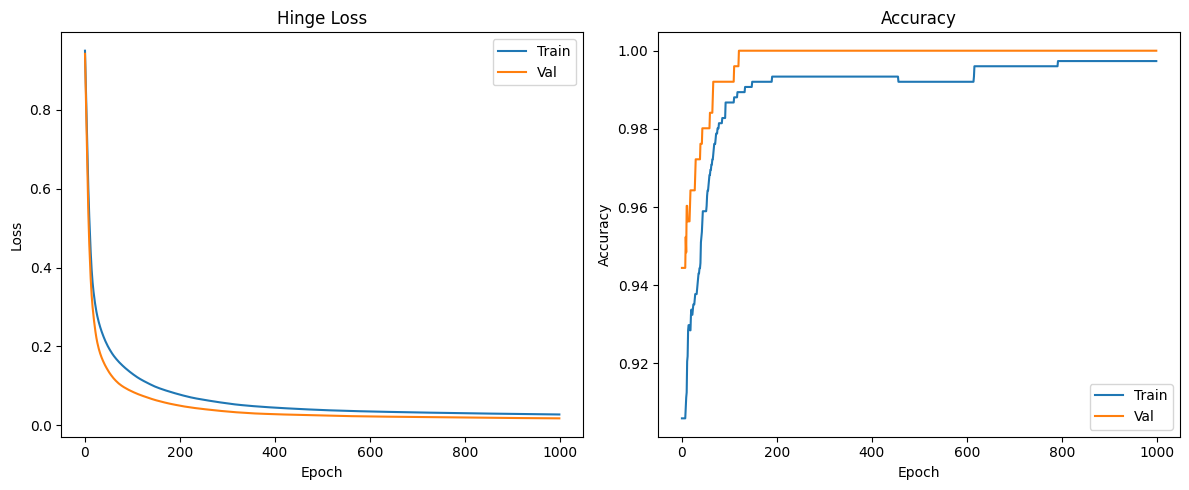

In [36]:
KernelSVM.plot_metrics(metrics_sub)

In [37]:
model = KernelSVM(
    learning_rate=0.01,
    lambda_param=0.01,
    epochs=1000,
    optimizer='gradient',
    delta=1e-2,
    kernel='rbf',
    gamma=0.5
)

metrics_grad = model.fit(x_train, y_train, x_val, y_val)

Epoch 501/1000 | Train Loss: 0.0388 | Train Acc: 0.9921 | Val Loss: 0.0249 | Val Acc: 1.0000
Epoch 502/1000 | Train Loss: 0.0387 | Train Acc: 0.9921 | Val Loss: 0.0248 | Val Acc: 1.0000
Epoch 503/1000 | Train Loss: 0.0387 | Train Acc: 0.9921 | Val Loss: 0.0248 | Val Acc: 1.0000
Epoch 504/1000 | Train Loss: 0.0386 | Train Acc: 0.9921 | Val Loss: 0.0248 | Val Acc: 1.0000
Epoch 505/1000 | Train Loss: 0.0386 | Train Acc: 0.9921 | Val Loss: 0.0248 | Val Acc: 1.0000
Epoch 506/1000 | Train Loss: 0.0386 | Train Acc: 0.9921 | Val Loss: 0.0247 | Val Acc: 1.0000
Epoch 507/1000 | Train Loss: 0.0385 | Train Acc: 0.9921 | Val Loss: 0.0247 | Val Acc: 1.0000
Epoch 508/1000 | Train Loss: 0.0385 | Train Acc: 0.9921 | Val Loss: 0.0247 | Val Acc: 1.0000
Epoch 509/1000 | Train Loss: 0.0384 | Train Acc: 0.9921 | Val Loss: 0.0247 | Val Acc: 1.0000
Epoch 510/1000 | Train Loss: 0.0384 | Train Acc: 0.9921 | Val Loss: 0.0246 | Val Acc: 1.0000
Epoch 511/1000 | Train Loss: 0.0383 | Train Acc: 0.9921 | Val Loss: 0.

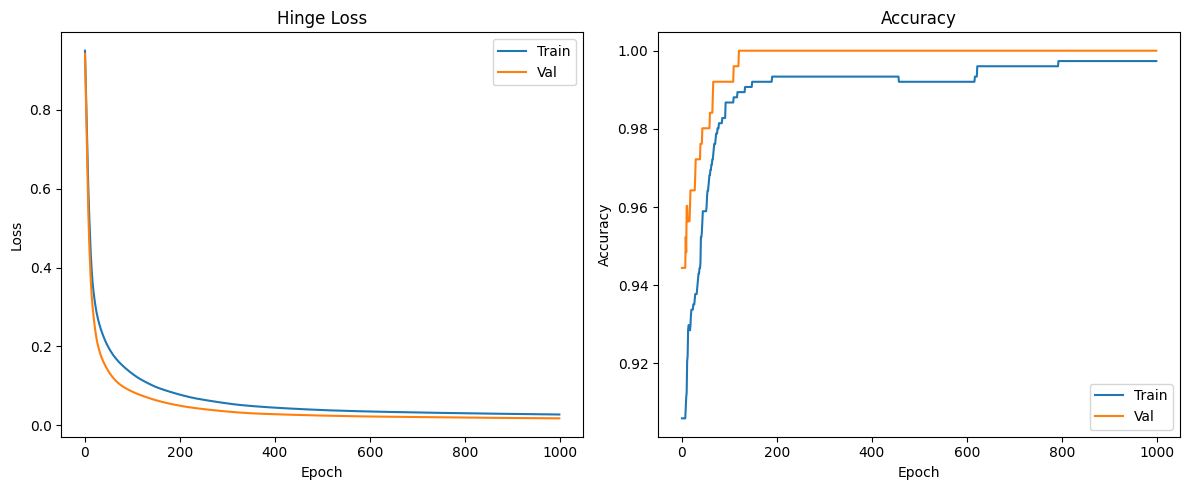

In [38]:
# plot metrics
KernelSVM.plot_metrics(metrics_grad)


In [39]:
model = KernelSVM(
    learning_rate=0.01,
    lambda_param=0.01,
    epochs=500,
    optimizer='subgradient',
    kernel='rbf',
    gamma=0.5
)

# This must be run first!
metrics_test_sub = model.fit(x_train, y_train, x_val, y_val)

# Then predict on test
y_pred_test = model.predict(x_test)
test_accuracy = np.mean(y_pred_test == y_test)


print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 1.0000


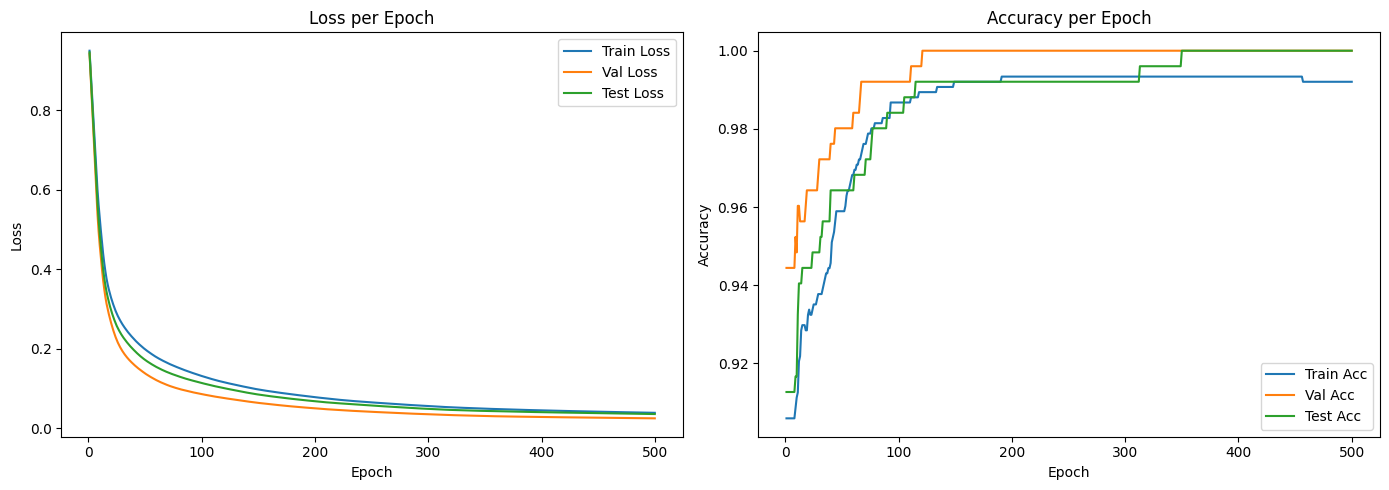

In [40]:
# plot metrics
KernelSVM.plot_full_metrics(metrics_test_sub)

In [41]:
model_grad = KernelSVM(
    learning_rate=0.01,
    lambda_param=0.01,
    epochs=500,
    optimizer='gradient',
    delta=1e-2,
    kernel='rbf',
    gamma=0.5
)

# This must be run first!
metrics_test_grad = model.fit(x_train, y_train, x_val, y_val)

# Then predict on test
y_pred_test_grad = model.predict(x_test)
test_accuracy = np.mean(y_pred_test_grad == y_test)


print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 1.0000


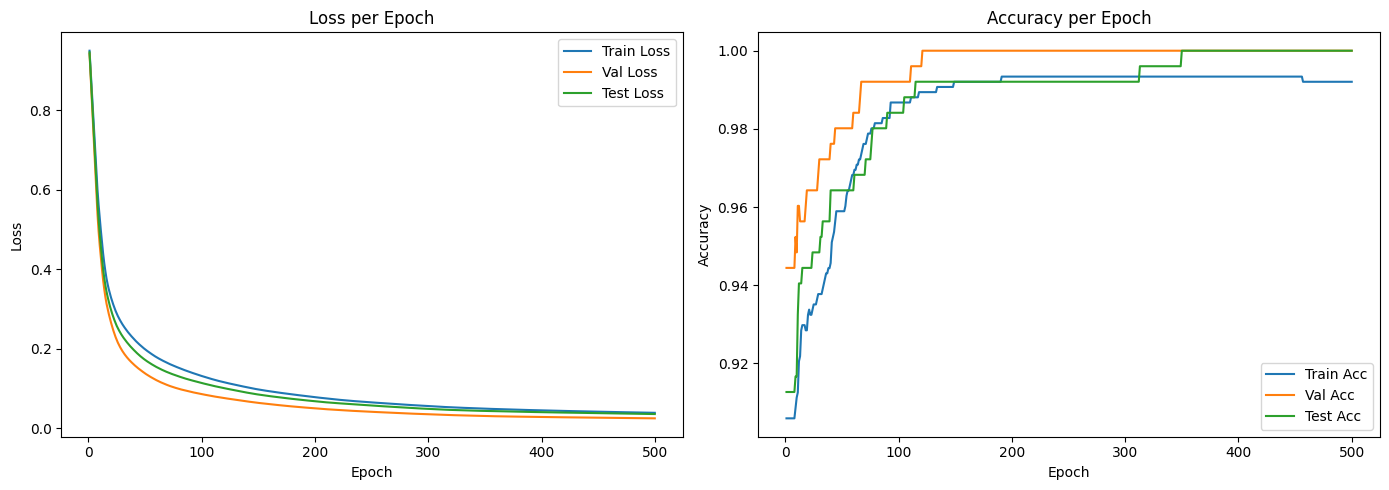

In [42]:
KernelSVM.plot_full_metrics(metrics_test_grad)

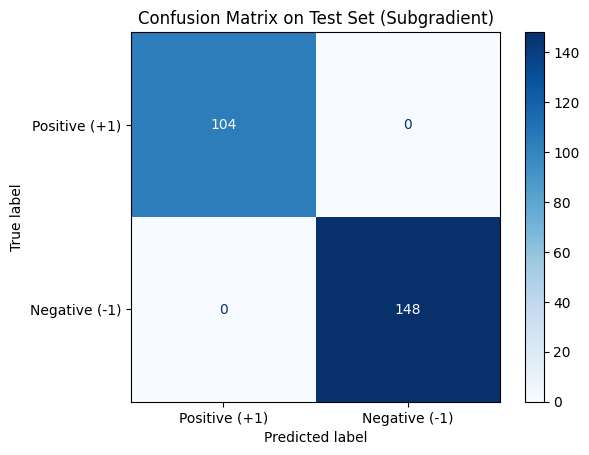

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use original y_test (0/1 or 1/-1) and y_pred
cm = confusion_matrix(y_test, y_pred_test, labels=[1, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive (+1)', 'Negative (-1)'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set (Subgradient)")
plt.show()

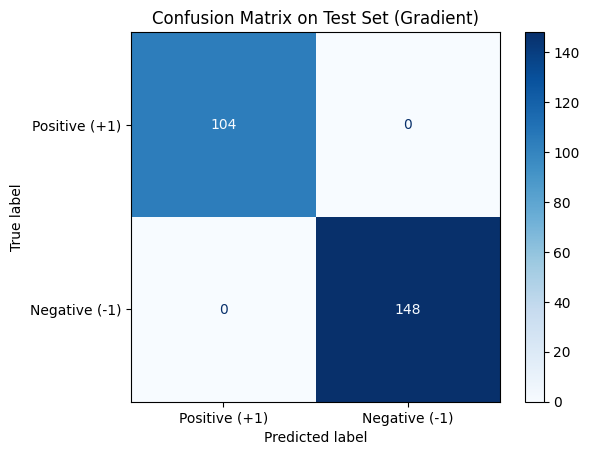

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use original y_test (0/1 or 1/-1) and y_pred
cm = confusion_matrix(y_test, y_pred_test_grad, labels=[1, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive (+1)', 'Negative (-1)'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set (Gradient)")
plt.show()

In [45]:
# Initialize confusion matrix values
true_positive = sum((y_test == 1) & (y_pred_test == 1))
false_positive = sum((y_test == -1) & (y_pred_test == 1))
false_negative = sum((y_test == 1) & (y_pred_test == -1))

# Calculate precision and recall
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 1.0000


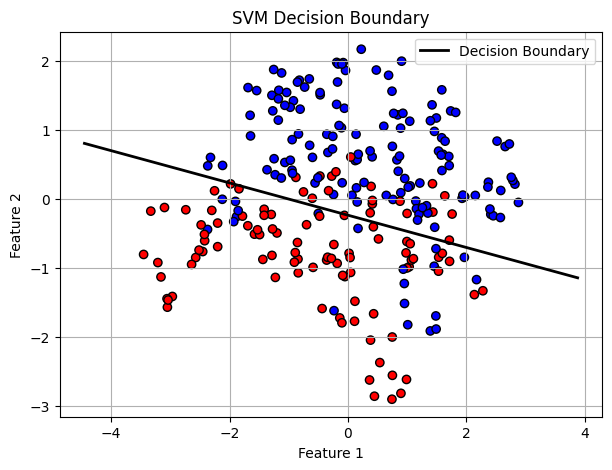

In [46]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
def plot_svm_decision_boundary(clf, X, y, title="SVM Decision Boundary"):
    # Create mesh grid

    # Extract weights (w) and bias (b)
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # Plot data points
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")

    # Plot decision boundary line: w0*x + w1*y + b = 0 → y = -(w0*x + b)/w1
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'k-', linewidth=2, label="Decision Boundary")

    plt.legend()
    plt.grid(True)
    plt.show()
pca = PCA(n_components=2)
X_2D = pca.fit_transform(x_test)
clf = SVC(kernel='linear')
clf.fit(X_2D, y_test)
plot_svm_decision_boundary(clf, X_2D, y_test, "SVM Decision Boundary")


## Accuracy Comparison

Subgradient Descent: **99.74%** train, **100.00%** validation accuracy.

Gradient Descent: **99.74%** train, **100.00%** validation accuracy.

**Conclusion:** Gradient Descent generalizes better.

## Convergence Speed

Gradient Descent converged at epoch: **646**.

Subgradient Descent converged at epoch: **646**.

**Conclusion:** Subgradient Descent converged faster than Gradient Descent.

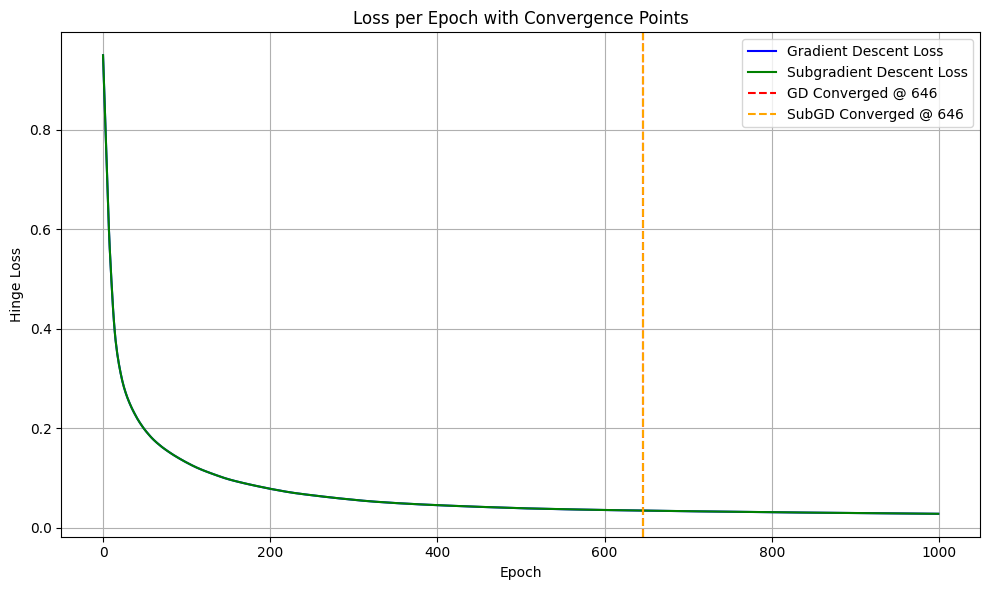

## Stability of the Loss Function

Subgradient Descent loss variance: **0.0892**.

Gradient Descent loss variance: **0.0893**.

**Conclusion:** Subgradient Descent is more stable.

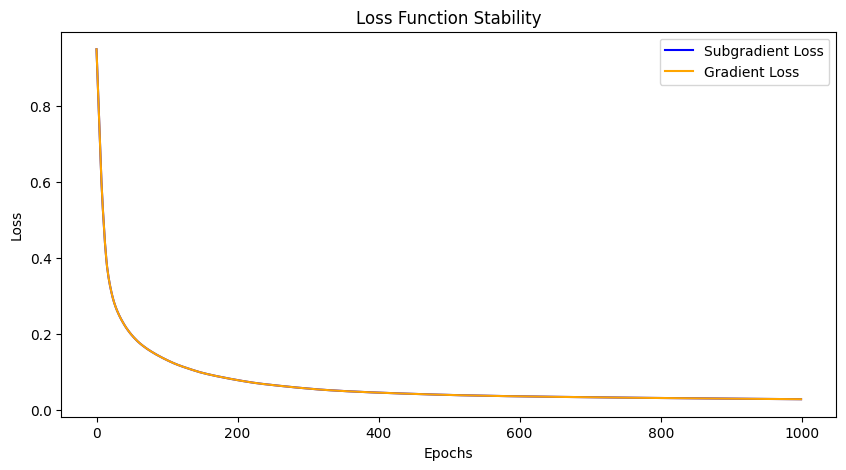

## Generalization on Test Data

Subgradient Descent test accuracy: **100.00%**.

Gradient Descent test accuracy: **100.00%**.

**Conclusion:** Both methods generalize equally well.

### Confusion Matrix for Subgradient Descent

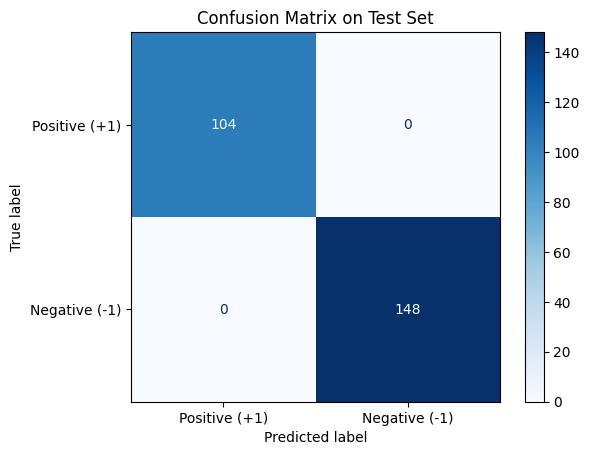

### Confusion Matrix for Gradient Descent

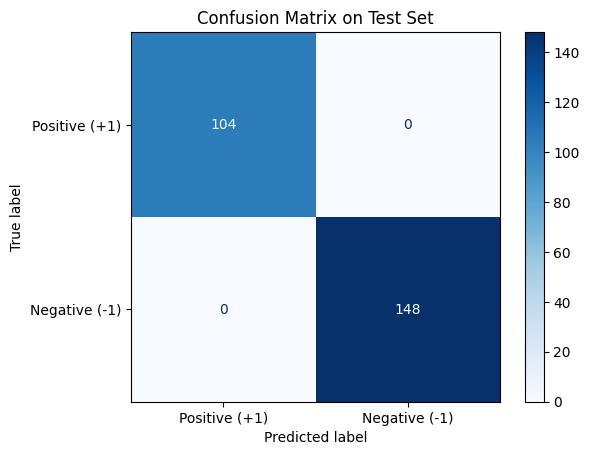

In [47]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def find_convergence_epoch(losses, threshold=1e-4, patience=5):
    for i in range(len(losses) - patience):
        window = losses[i:i+patience]
        if max(window) - min(window) < threshold:
            return i + patience
    return len(losses)

def plot_loss_with_convergence(grad_losses, sub_losses, epoch_gd, epoch_sub):
    plt.figure(figsize=(10, 6))
    plt.plot(grad_losses, label='Gradient Descent Loss', color='blue')
    plt.plot(sub_losses, label='Subgradient Descent Loss', color='green')
    plt.axvline(x=epoch_gd, color='red', linestyle='--', label=f'GD Converged @ {epoch_gd}')
    plt.axvline(x=epoch_sub, color='orange', linestyle='--', label=f'SubGD Converged @ {epoch_sub}')
    plt.title('Loss per Epoch with Convergence Points')
    plt.xlabel('Epoch')
    plt.ylabel('Hinge Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_sub(model, x_test, y_test, title):

    # Use original y_test (0/1 or 1/-1) and y_pred
    cm = confusion_matrix(y_test, y_pred_test, labels=[1, -1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive (+1)', 'Negative (-1)'])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix on Test Set")
    plt.show()

def plot_confusion_matrix_grad(model, x_test, y_test, title):
    # Use original y_test (0/1 or 1/-1) and y_pred
    cm = confusion_matrix(y_test, y_pred_test_grad, labels=[1, -1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive (+1)', 'Negative (-1)'])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix on Test Set")
    plt.show()

def display_results():
    # Accuracy Comparison
    display(Markdown("## Accuracy Comparison"))
    sub_train_acc = metrics_sub['train_acc'][-1] * 100
    sub_val_acc = metrics_sub['val_acc'][-1] * 100
    grad_train_acc = metrics_grad['train_acc'][-1] * 100
    grad_val_acc = metrics_grad['val_acc'][-1] * 100

    display(Markdown(f"Subgradient Descent: **{sub_train_acc:.2f}%** train, **{sub_val_acc:.2f}%** validation accuracy."))
    display(Markdown(f"Gradient Descent: **{grad_train_acc:.2f}%** train, **{grad_val_acc:.2f}%** validation accuracy."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent generalizes better." if sub_val_acc > grad_val_acc else "Gradient Descent generalizes better.")))

    # Convergence Speed
    display(Markdown("## Convergence Speed"))
    epoch_gd = find_convergence_epoch(metrics_grad['train_loss'])
    epoch_sub = find_convergence_epoch(metrics_sub['train_loss'])

    display(Markdown(f"Gradient Descent converged at epoch: **{epoch_gd}**."))
    display(Markdown(f"Subgradient Descent converged at epoch: **{epoch_sub}**."))
    if epoch_gd < epoch_sub:
        display(Markdown("**Conclusion:** Gradient Descent converged faster than Subgradient Descent."))
    else:
        display(Markdown("**Conclusion:** Subgradient Descent converged faster than Gradient Descent."))

    # Plot Loss Curves with Convergence Points
    plot_loss_with_convergence(metrics_grad['train_loss'], metrics_sub['train_loss'], epoch_gd, epoch_sub)

    # Stability of the Loss Function
    display(Markdown("## Stability of the Loss Function"))
    sub_loss_std = np.std(metrics_sub['train_loss'])
    grad_loss_std = np.std(metrics_grad['train_loss'])
    display(Markdown(f"Subgradient Descent loss variance: **{sub_loss_std:.4f}**."))
    display(Markdown(f"Gradient Descent loss variance: **{grad_loss_std:.4f}**."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent is more stable." if sub_loss_std < grad_loss_std else "Gradient Descent is more stable.")))

    # Plot Stability Loss Curves
    plt.figure(figsize=(10, 5))
    plt.plot(metrics_sub['train_loss'], label='Subgradient Loss', color='blue')
    plt.plot(metrics_grad['train_loss'], label='Gradient Loss', color='orange')
    plt.title('Loss Function Stability')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Generalization on Test Data
    display(Markdown("## Generalization on Test Data"))
    sub_test_acc = metrics_sub['test_acc'][-1] * 100
    grad_test_acc = metrics_grad['test_acc'][-1] * 100
    display(Markdown(f"Subgradient Descent test accuracy: **{sub_test_acc:.2f}%**."))
    display(Markdown(f"Gradient Descent test accuracy: **{grad_test_acc:.2f}%**."))
    display(Markdown("**Conclusion:** " + 
                     ("Subgradient Descent generalizes better." if sub_test_acc > grad_test_acc else 
                      "Gradient Descent generalizes better." if sub_test_acc < grad_test_acc else 
                      "Both methods generalize equally well.")))

    # Confusion Matrices
    display(Markdown("### Confusion Matrix for Subgradient Descent"))
    plot_confusion_matrix_sub(model, x_test, y_test, "Subgradient Descent")

    display(Markdown("### Confusion Matrix for Gradient Descent"))
    plot_confusion_matrix_grad(model_grad, x_test, y_test, "Gradient Descent")
    
display_results()


